In [1]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 46.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Fou

In [2]:
import pandas as pd

df = pd.read_csv('sejong1000QA.csv')
df.head()

,Q,A,label
0,몇 번째 왕이세요?,짐은 조선의 제4대 왕이다.,0
1,부모님은 누구신가요,"짐은 태종의 셋째아들이며, 어머니는 원경왕후 민씨이다.",0
2,이름이 뭔가요?,짐의 이름은 이도이니라.,0
3,언제 왕세자에 책봉되었나요?,짐은 1418년 6월 왕세자에 책봉되었다,0
4,재위 기간이 어떻게 되시나요?,"1418-1450년이며, 1418년 6월에 왕세자에 책봉되었다가 8월에 태종의 양위...",0


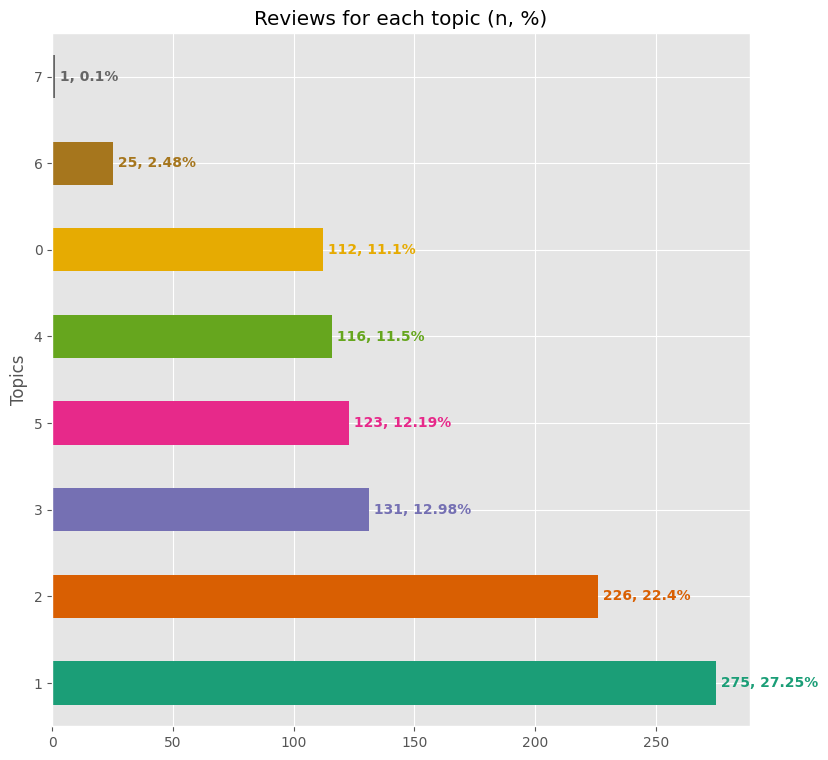

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


num_classes = len(df["label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

df['label'].value_counts().plot.barh(title="Reviews for each topic (n, %)",
                                                 ylabel="Topics",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(df['label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/df.shape[0],2))+"%",
           color=c,
           va='center',
           fontweight='bold')

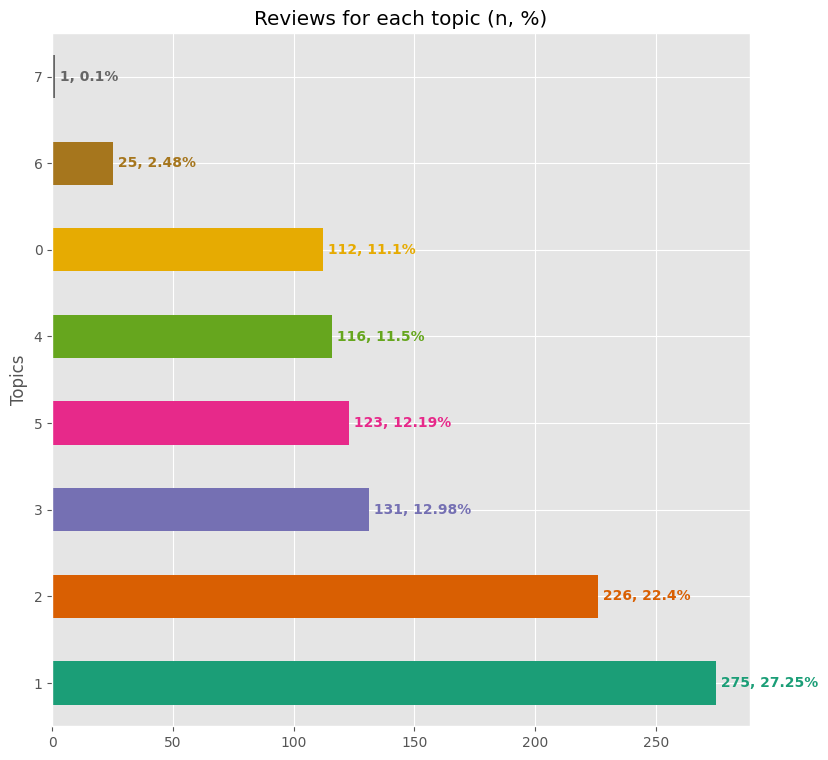

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


num_classes = len(df["label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

df['label'].value_counts().plot.barh(title="Reviews for each topic (n, %)",
                                                 ylabel="Topics",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(df['label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/df.shape[0],2))+"%",
           color=c,
           va='center',
           fontweight='bold')

In [5]:
!pip install translate

In [6]:

# for Colab users: !pip install translate
from translate import Translator
from termcolor import colored


translator= Translator(from_lang="it", to_lang="en")

def print_rand_example(df, col_name, col_value, chars=180):
  '''print a random review and its translation given a label
  Args:
    - df: input dataframe
    - col_name: column to use as filter (e.g. Label)
    - col_value: value of col_name to use as filter
    - chars (optional, def:180) max number of characters to display
  '''
  original = df[df[col_name]==col_value].sample()["Q"].values[0]
  translation = translator.translate(original).replace("&#39;","'")
  print(colored("\nOriginal", 'green', attrs=['bold','underline']))
  print(original[0:chars] + "...")
  print(colored("\nTranslation", 'red', attrs=['bold','underline']))
  print(translation[0:chars] + "...")

In [7]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

y = tf.keras.utils.to_categorical(df["label"].values, num_classes=num_classes)

x_train, x_test, y_train, y_test = train_test_split(df['Q'], y, test_size=0.25)

In [8]:
import tensorflow_hub as hub
import tensorflow_text as text

preprocessor = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2")
encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-base/1")


def get_embeddings(sentences):
  '''return BERT-like embeddings of input text
  Args:
    - sentences: list of strings
  Output:
    - BERT-like embeddings: tf.Tensor of shape=(len(sentences), 768)
  '''
  preprocessed_text = preprocessor(sentences)
  return encoder(preprocessed_text)['pooled_output']


get_embeddings([
    "Questa collezione di Haiku è una porta aperta sulla cultura giapponese."]
)

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[ 1.08301327e-01, -9.18217674e-02, -3.19872409e-01,
        -1.67230796e-02,  3.33886743e-01,  2.00450286e-01,
        -2.47139931e-01, -5.43195367e-01, -3.57289463e-01,
        -2.97792882e-01, -2.08847567e-01,  1.42039582e-01,
         2.71120835e-02, -4.34331000e-01, -5.73736906e-01,
        -8.82342339e-01,  2.37395287e-01, -1.87623113e-01,
        -2.56785035e-01, -2.46523157e-01,  6.32115364e-01,
         1.21219508e-01, -3.95455897e-01,  1.57741413e-01,
        -6.54235035e-02, -1.00966644e+00,  3.03083003e-01,
         2.43483279e-02, -9.88365635e-02, -6.36492074e-01,
         1.15217924e-01, -7.62794852e-01, -5.44121206e-01,
        -4.67442214e-01, -6.23929083e-01,  2.63770461e-01,
        -4.41493869e-01,  6.61390796e-02, -3.88869315e-01,
         1.61346663e-02,  1.15037791e-01, -4.35636997e-01,
        -5.12471557e-01,  2.74849504e-01, -3.43942434e-01,
        -1.88016474e-01,  1.58042330e-02, -3.23275715e-01,
      

In [9]:
from keras import backend as K

def balanced_recall(y_true, y_pred):
    """This function calculates the balanced recall metric
    recall = TP / (TP + FN)
    """
    recall_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true_class, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        recall_by_class = recall_by_class + recall
    return recall_by_class / y_pred.shape[1]

def balanced_precision(y_true, y_pred):
    """This function calculates the balanced precision metric
    precision = TP / (TP + FP)
    """
    precision_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred_class, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        precision_by_class = precision_by_class + precision
    # return average balanced metric for each class
    return precision_by_class / y_pred.shape[1]

def balanced_f1_score(y_true, y_pred):
    """This function calculates the F1 score metric"""
    precision = balanced_precision(y_true, y_pred)
    recall = balanced_recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [10]:
i = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
x = preprocessor(i)
x = encoder(x)
x = tf.keras.layers.Dropout(0.2, name="dropout")(x['pooled_output'])
x = tf.keras.layers.Dense(num_classes, activation='softmax', name="output")(x)

model = tf.keras.Model(i, x)

In [11]:
x_train = np.array([np.array(val) for val in x_train])  # reconstruct

In [12]:
n_epochs = 20

METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
      balanced_recall,
      balanced_precision,
      balanced_f1_score
]

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                      patience = 3,
                                                      restore_best_weights = True)

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = METRICS)

model_fit = model.fit(x_train,
                      y_train,
                      epochs = n_epochs,
                      validation_data = (x_test, y_test),
                      callbacks = [earlystop_callback])

Epoch 1/20
24/24 [==============================] - 23s 255ms/step - loss: 1.7552 - accuracy: 0.3558 - balanced_recall: 0.0109 - balanced_precision: 0.0495 - balanced_f1_score: 0.0175 - val_loss: 1.3170 - val_accuracy: 0.6640 - val_balanced_recall: 0.0096 - val_balanced_precision: 0.0781 - val_balanced_f1_score: 0.0170
Epoch 2/20
24/24 [==============================] - 3s 133ms/step - loss: 1.2054 - accuracy: 0.6601 - balanced_recall: 0.1557 - balanced_precision: 0.3500 - balanced_f1_score: 0.2101 - val_loss: 0.9711 - val_accuracy: 0.8182 - val_balanced_recall: 0.2354 - val_balanced_precision: 0.5000 - val_balanced_f1_score: 0.3183
Epoch 3/20
24/24 [==============================] - 3s 138ms/step - loss: 0.8827 - accuracy: 0.8148 - balanced_recall: 0.3435 - balanced_precision: 0.6218 - balanced_f1_score: 0.4388 - val_loss: 0.7760 - val_accuracy: 0.8538 - val_balanced_recall: 0.4149 - val_balanced_precision: 0.6562 - val_balanced_f1_score: 0.5059
Epoch 4/20
24/24 [=====================

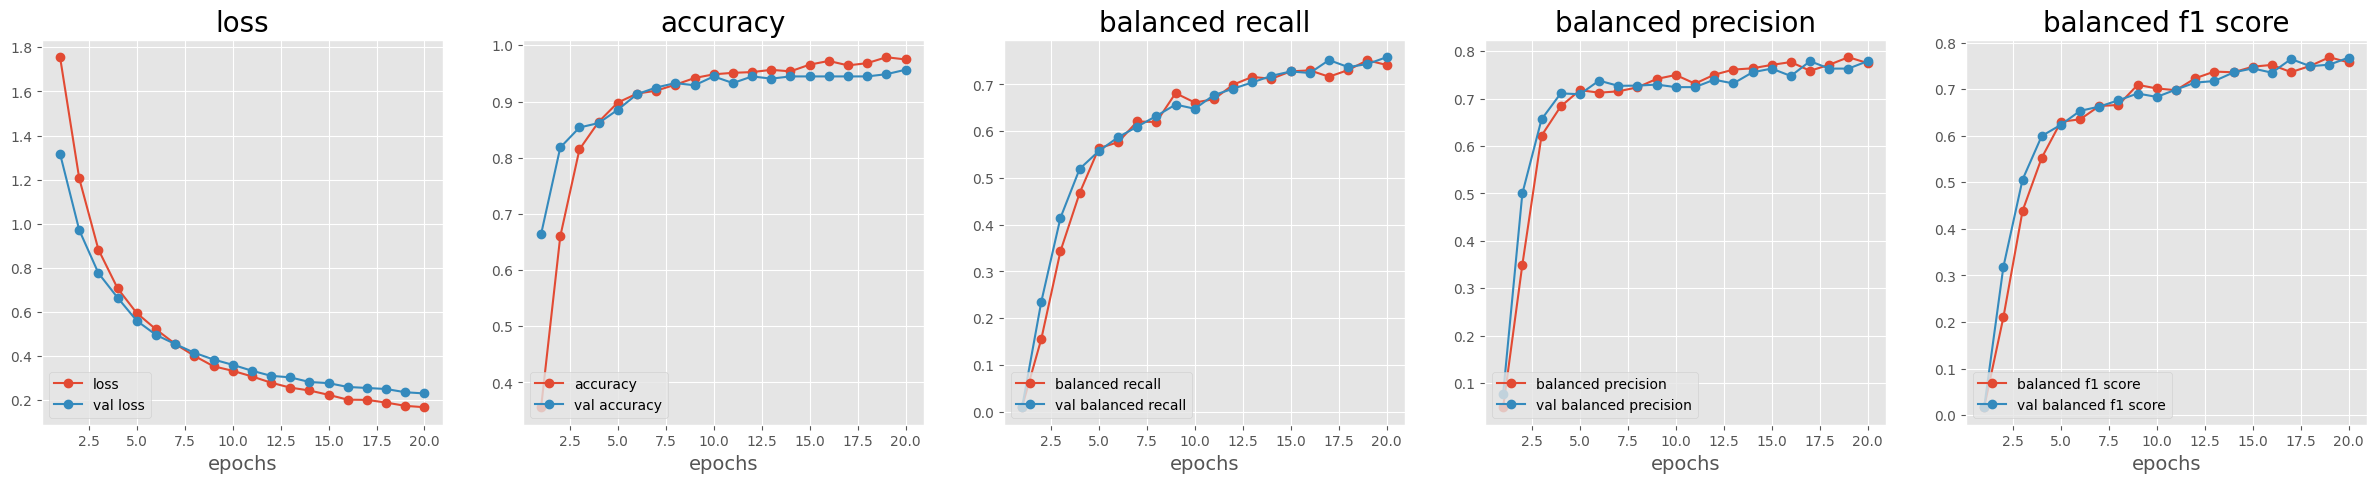

In [13]:
x = list(range(1, n_epochs+1))
metric_list = list(model_fit.history.keys())
num_metrics = int(len(metric_list)/2)

fig, ax = plt.subplots(nrows=1, ncols=num_metrics, figsize=(30, 5))

for i in range(0, num_metrics):
  ax[i].plot(x, model_fit.history[metric_list[i]], marker="o", label=metric_list[i].replace("_", " "))
  ax[i].plot(x, model_fit.history[metric_list[i+num_metrics]], marker="o", label=metric_list[i+num_metrics].replace("_", " "))
  ax[i].set_xlabel("epochs",fontsize=14)
  ax[i].set_title(metric_list[i].replace("_", " "),fontsize=20)
  ax[i].legend(loc="lower left")

In [22]:
# test prediction on some newly generated reviews
reviews = [
    "해시계가 무엇인가요?",
    "이름이 무엇인가요?",
    "훈민정음에 대해 알려주세요.",
    "세종의 신념은 무엇인가요?",
    "집현전에 대해 알려주세요"
]

# observe translated samples
print([translator.translate(review).replace("&#39;","'") for review in reviews])

['해시계가 무엇인가요?', '이름이 무엇인가요?', '훈민정음에 대해 알려주세요.', '세종의 신념은 무엇인가요?', '집현전에 대해 알려주세요']


In [23]:
def predict_class(reviews):
  '''predict class of input text
  Args:
    - reviews (list of strings)
  Output:
    - class (list of int)
  '''
  return [np.argmax(pred) for pred in model.predict(reviews)]


predict_class(reviews)

1/1 [==============================] - 0s 48ms/step


[4, 0, 3, 6, 1]